# Prediction on kiki, should we bet on a Mbappe goal on WINAMAX tonight ?

### Scikit learn
### I made over $1000 betting on Kylian scoring during matches this season. Here’s how I had fun playing with trustworthy data.
#### Let's search the internet for a table with Mbappe's stats (14/02/25).

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time


url = "https://fbref.com/en/players/42fd9c7f/Kylian-Mbappe"

options = Options()
options.add_argument("--headless")  # ou enlève pour voir la page
options.add_argument('--disable-blink-features=AutomationControlled')

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
driver.get(url)

time.sleep(5)  
soup = BeautifulSoup(driver.page_source, 'html.parser')
driver.quit()

# look for all the tabs
tables = soup.find_all("table")
print(f"{len(tables)} tables found")

62 tables found


#### Let's find the tab we're interested in on the web page.

In [15]:
for i, tab in enumerate(tables):
    print(f"Table {i}: id = {tab.get('id')}, caption = {tab.caption.text.strip() if tab.caption else 'No caption'}")


Table 0: id = scout_summary_FW, caption = Kylian Mbappé Scouting Report Table
Table 1: id = similar_FW, caption = Similar Players to Kylian Mbappé Table
Table 2: id = stats_standard_dom_lg, caption = Standard Stats: Domestic Leagues Table
Table 3: id = stats_shooting_dom_lg, caption = Shooting: Domestic Leagues Table
Table 4: id = stats_passing_dom_lg, caption = Passing: Domestic Leagues Table
Table 5: id = stats_passing_types_dom_lg, caption = Pass Types: Domestic Leagues Table
Table 6: id = stats_gca_dom_lg, caption = Goal and Shot Creation: Domestic Leagues Table
Table 7: id = stats_defense_dom_lg, caption = Defensive Actions: Domestic Leagues Table
Table 8: id = stats_possession_dom_lg, caption = Possession: Domestic Leagues Table
Table 9: id = stats_playing_time_dom_lg, caption = Playing Time: Domestic Leagues Table
Table 10: id = stats_misc_dom_lg, caption = Miscellaneous Stats: Domestic Leagues Table
Table 11: id = stats_player_summary_42fd9c7f, caption = Player Club Summary Tab

In [17]:
tables = soup.find("table", {"id": "stats_standard_dom_lg"})   
# Récupérer uniquement la dernière ligne d'en-têtes (la plus précise)
header_rows = tables.find("thead").find_all("tr")
last_header = header_rows[-1]  
columns = [th.text.strip() for th in last_header.find_all("th")]

# Vérifier combien de colonnes ont été extraites
print(f"Nombre de colonnes trouvées: {len(columns)}")
print(f"Colonnes: {columns}")


Nombre de colonnes trouvées: 36
Colonnes: ['Season', 'Age', 'Squad', 'Country', 'Comp', 'LgRank', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls', 'Ast', 'G+A', 'G-PK', 'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG', 'Matches']


#### Let's prepare a df with the stats and parameters we consider important in relation to kiki's effcassity in front of goal.

In [19]:
import pandas as pd

# Extract data from the table
data = []
for row in tables.find("tbody").find_all("tr"):
    cols = row.find_all(["th", "td"])
    row_data = [col.text.strip() for col in cols]

    # Check that the row has the expected number of columns
    if len(row_data) == len(columns):
        data.append(row_data)
    else:
        print(f"⚠️ Skipping problematic row: {row_data}")

# Convert to DataFrame
df = pd.DataFrame(data, columns=columns)
df = df.fillna(0)

# Show a preview of the DataFrame
print(df.head())


      Season Age      Squad Country        Comp LgRank  MP Starts    Min  \
0  2015-2016  16     Monaco  fr FRA  1. Ligue 1    3rd  11      2    296   
1  2016-2017  17     Monaco  fr FRA  1. Ligue 1    1st  29     17  1,498   
2  2017-2018  18     Monaco  fr FRA  1. Ligue 1    2nd   1      1     74   
3  2017-2018  18  Paris S-G  fr FRA  1. Ligue 1    1st  27     24  2,094   
4  2018-2019  19  Paris S-G  fr FRA  1. Ligue 1    1st  29     24  2,343   

    90s  ...   Ast   G+A  G-PK G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  \
0   3.3  ...  0.30  0.61  0.30   0.61                                     
1  16.6  ...  0.42  1.32  0.90   1.32                                     
2   0.8  ...  0.00  0.00  0.00   0.00  0.19  0.00   0.19  0.19     0.19   
3  23.3  ...  0.34  0.90  0.56   0.90  0.60  0.35   0.95  0.60     0.95   
4  26.0  ...  0.27  1.54  1.23   1.50  1.08  0.21   1.28  1.01     1.22   

   Matches  
0  Matches  
1  Matches  
2  Matches  
3  Matches  
4  Matches  

[5 rows x 36 

In [20]:
colone_d_analyse = ["Season","Squad","Comp","MP","Min","Gls",'Ast','G+A','xG', 'npxG', 'xAG', 'npxG+xAG']
df_filtre= df[colone_d_analyse]
print(df_filtre)

       Season        Squad        Comp  MP    Min Gls   Gls Ast   Ast G+A  \
0   2015-2016       Monaco  1. Ligue 1  11    296   1  0.30   1  0.30   2   
1   2016-2017       Monaco  1. Ligue 1  29  1,498  15  0.90   7  0.42  22   
2   2017-2018       Monaco  1. Ligue 1   1     74   0  0.00   0  0.00   0   
3   2017-2018    Paris S-G  1. Ligue 1  27  2,094  13  0.56   8  0.34  21   
4   2018-2019    Paris S-G  1. Ligue 1  29  2,343  33  1.27   7  0.27  40   
5   2019-2020    Paris S-G  1. Ligue 1  20  1,513  18  1.07   5  0.30  23   
6   2020-2021    Paris S-G  1. Ligue 1  31  2,380  27  1.02   7  0.26  34   
7   2021-2022    Paris S-G  1. Ligue 1  35  3,023  28  0.83  17  0.51  45   
8   2022-2023    Paris S-G  1. Ligue 1  34  2,818  29  0.93   5  0.16  34   
9   2023-2024    Paris S-G  1. Ligue 1  29  2,158  27  1.13   7  0.29  34   
10  2024-2025  Real Madrid  1. La Liga  34  2,907  31  0.96   3  0.09  34   

     G+A    xG    xG  npxG  npxG   xAG   xAG npxG+xAG npxG+xAG  
0   0.61  

### Let's do some preliminary analysis of our national kiki's stats.

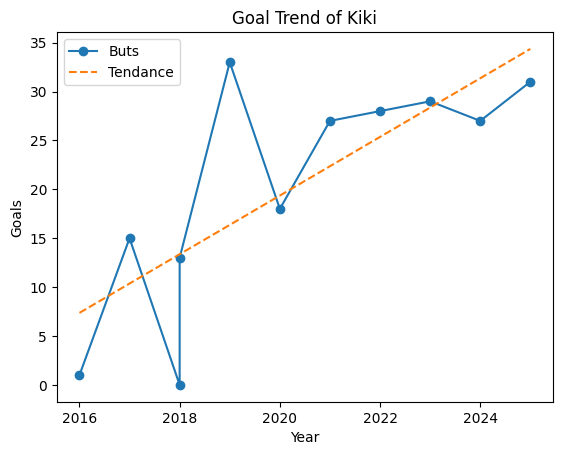

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df['Saison_num'] = df['Season'].apply(lambda x: int(x.split('-')[1]))
x =df['Saison_num']
Gls = pd.to_numeric(df[['Gls']].iloc[:, 0] , errors='coerce')

slope, intercept, r_value, p_value, std_err = stats.linregress(x, Gls)

plt.plot(x,Gls,marker='o',label='Buts')
plt.plot(x,slope*x+intercept,label="Tendance", linestyle="--")
plt.xlabel('Year')
plt.ylabel('Goals')
plt.title('Goal Trend of Kiki')
plt.legend()
plt.show()

#### Correlation between xG and buts

In [22]:
xG = pd.to_numeric(df[['xG']].iloc[:, 0] , errors='coerce')
correlation = xG.corr(Gls)
print(f"Correlation between xG and goals: {correlation}")


Correlation between xG and goals: 0.98827429607195


#### Tracons les XG contre les buts marque de mbappe sur toutes ses saisons pro de sa carirere.

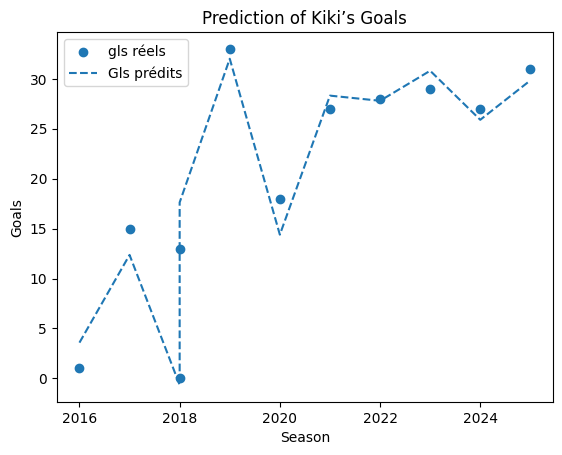

In [23]:
from sklearn.linear_model import LinearRegression

# 
df = df.fillna(0)
Ast =pd.to_numeric(df[['Ast']].iloc[:, 0] , errors='coerce')
MP = pd.to_numeric(df['MP'], errors='coerce')
xAG = pd.to_numeric(df[['xAG']].iloc[:, 0] , errors='coerce')
x_saison =df['Saison_num']

# Préparer les données
x = pd.DataFrame({'MP': MP,'Ast': Ast,'xG': xG,'xAG': xAG})
x = x.fillna(0)


# Créer le modèle
model = LinearRegression()
model.fit(x, Gls)

# Prédire les buts
df['Gls_predits'] = model.predict(x)


# Tracer les prédictions contre les vrais buts
plt.scatter(x_saison, Gls, label="gls réels")
plt.plot(x_saison, df['Gls_predits'], label="Gls prédits", linestyle="--")
plt.xlabel('Season')
plt.ylabel('Goals')
plt.title('Prediction of Kiki’s Goals')
plt.legend()
plt.show()

#### Let's create a model to determine the number of Mbappe's goals over a chosen number of matches.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import t

df = df.fillna(0)

x
# Create and train the regression model
model = LinearRegression()
model.fit(x, Gls)

# Predict goals for the next season (with 30 matches played)
future_data = pd.DataFrame({
    'MP': [30],  # 30 matches
    'Ast': Ast.mean(),  # Average past assists
    'xG': xG.mean(),    # Average past xG
    'xAG': xAG.mean()   # Average past xAG
})

predicted_goals = model.predict(future_data)[0]

# Calculate the standard error and 95% confidence interval
y_pred = model.predict(x)
residuals = Gls - y_pred  # Model errors
std_error = np.std(residuals)  # Standard deviation of errors
n = len(Gls)  # Number of samples
t_value = t.ppf(0.975, df=n-1)  # Critical t-value for 95% confidence interval

margin_error = t_value * (std_error / np.sqrt(n))  # Margin of error
lower_bound = predicted_goals - margin_error  # Lower bound
upper_bound = predicted_goals + margin_error  # Upper bound

# Display the result
print(f"📊 Prediction for 30 matches: {predicted_goals:.2f} goals")
print(f"🔍 95% confidence interval: [{lower_bound:.2f} - {upper_bound:.2f}] goals")


📊 Prediction for 30 matches: 24.20 goals
🔍 95% confidence interval: [22.67 - 25.73] goals


#### Clusters of Mbappé's seasons

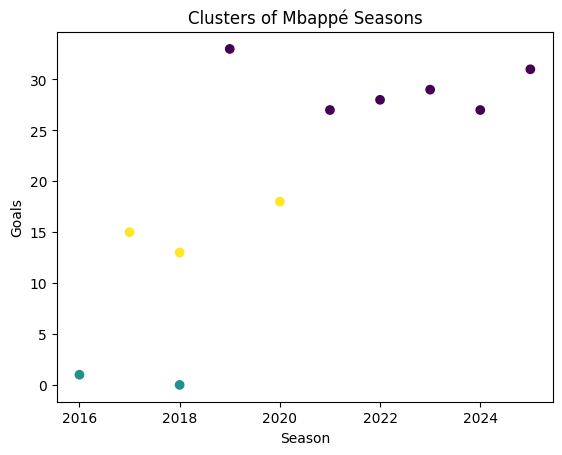

In [25]:
from sklearn.cluster import KMeans

# Select the features to use for clustering
# ["Season","Squad","Comp","MP","Min","Gls",'Ast','G+A','xG', 'npxG', 'xAG', 'npxG+xAG']

Xx = pd.DataFrame({'MP': MP, 'Gls': Gls, 'xG': xG, 'Ast': Ast})
Xx = Xx.fillna(0)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(Xx)

# Visualize the clusters
plt.scatter(df['Saison_num'], Gls, c=df['Cluster'], cmap='viridis')
plt.xlabel('Season')
plt.ylabel('Goals')
plt.title('Clusters of Mbappé Seasons')
plt.show()



#### Let's try to detect goal anomalies in Mbappe's pro seasons.

In [26]:
from sklearn.ensemble import IsolationForest

# Use Isolation Forest to detect anomalies in goals scored
model = IsolationForest(contamination=0.1)  # 10% of the data are considered anomalies
# df['Anomaly'] = model.fit_predict(df[['Buts']])
df['Anomaly'] = model.fit_predict(df[['Gls']])

# Display the anomalies
df_anomalies = df[df['Anomaly'] == -1]
print(df_anomalies)


      Season Age   Squad Country        Comp LgRank MP Starts Min  90s  ...  \
2  2017-2018  18  Monaco  fr FRA  1. Ligue 1    2nd  1      1  74  0.8  ...   

     xG   xAG xG+xAG  npxG npxG+xAG  Matches Saison_num Gls_predits Cluster  \
2  0.19  0.00   0.19  0.19     0.19  Matches       2018   -0.657303       1   

  Anomaly  
2      -1  

[1 rows x 40 columns]


#### Simple descriptive statistics for goals/season.

In [28]:
# Descriptive statistics for kiki's objectives
print(Gls.describe())


count    11.000000
mean     20.181818
std      11.711688
min       0.000000
25%      14.000000
50%      27.000000
75%      28.500000
max      33.000000
Name: Gls, dtype: float64


# Quick Interpretation of Mbappé’s Goal Statistics

- **Count (11):** There are 11 seasons Kylian registered in.

- **Mean (~20.18):** On average, Kylian scores about 20 goals per season.

- **Std (~11.71):** The variation is quite large, with a standard deviation of nearly 12 goals.

- **Min (0):** There is at least one season with zero goals (this is due to his beginning season where he didn't play but was only registered).

- **25% (14):** 25% of the seasons have fewer than 14 goals.

- **Median (50%, 27):** The median season has 27 goals, meaning half the seasons are above this number.

- **75% (28.5):** 75% of the seasons have fewer than 28.5 goals.

- **Max (33):** The maximum goals scored in a season is 33.

---

**Quick conclusion:** Mbappé generally shows strong goal-scoring ability with seasons typically ranging between 20 and 30 goals.


#### (05/06/25) Now that we know kilian is a Golden Shoe winner, let's see if our model aligns with kilian's first season at REAL MADRID with 28 goals in La Liga.